# ニューラルネット

Python は，豊富なライブラリを備えています。特に，ニューラルネットワークなどの機械学習のライブラリが充実しています。機械学習の仕組みの詳細を知らなくても，データを揃えてライブラリを呼び出せば，ある程度のことができる状態になっています。文字認識のニューラルネットを題材に，その使い方を説明します。

ニューラルネットのライブラリとしては，Google が開発したオープンソースのシステムである TensorFlow が有名です。
さらに，Tensorflow のニューラルネットワークを組むための高レベルのライブラリである Keras を用いると，見よう見まねで，ある程度の機械学習を行えます。

Keras は， anaconda には標準でインストールされていません。インストールする時には，
base(root) にインストールする以外に，環境を作ってそこにインストールすることができます。
環境を作っておくと，他の研究を行うために他のパッケージのインストールを行った時に，パッケージごとの衝突や，バージョンの不整合などが起きる可能性を低くできます。ですから，別環境を作ることをお勧めです。実際，Python の最新バージョン(3.9) では，Tensorflow が動かなさそうで，バージョンを下げた環境を作る必要がありそうです。

anaconda の立ち上げの画面で，左側の Environments のタグの下から，Create で新しい環境（例えば，MNIST）を作りましょう。Not Installed をメニューから選んで Keras を検索しましょう。keras を選択し，Apply でインストールします。tensor flow もインストールします。

Home に戻って，上の，Application on *** というタグから，作った環境(MNIST) を選んで，Jupyter Notebook を Install し，起動しましょう。そこで，このファイルを開き直しましょう。

うまくインストールされていたら，以下が動くはずです。
このソースは，以下のページからとってきたものを，説明用に加工したものです。
このページの解説は十分によく書けているので，これを見て勉強してください。

https://weblabo.oscasierra.net/python/keras-mnist-sample.html


ただし，場合によっては，python のバージョンを下げることが要求されます。
それは，anaconda の画面からはできなそうで，conda コマンドで行います。
```
conda info -e       environment を見ます。
conda activate mnist    mnist にデフォルトの environment を変えます。
conda install python=3.7   python のバージョンを 3.7 に下げます。
conda install tensorflow   tenforflow のインストール
```

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
# MNISTデータを読込む
(raw_x_train, raw_y_train), (raw_x_test, raw_y_test) = mnist.load_data()

mnist は，手書きの数字のテストデータとして広く使われているデータです。mnist モジュールのload_data() の呼び出しで，ネットからダウンロードされ，トレーニング用，テスト用のデータに分けられます。

In [3]:
print(type(raw_x_train), raw_x_train.shape, raw_x_train.dtype)
print(type(raw_y_train), raw_y_train.shape, raw_y_train.dtype)
print(type(raw_x_test), raw_x_test.shape, raw_x_test.dtype)
print(type(raw_y_test), raw_y_test.shape, raw_y_test.dtype)

<class 'numpy.ndarray'> (60000, 28, 28) uint8
<class 'numpy.ndarray'> (60000,) uint8
<class 'numpy.ndarray'> (10000, 28, 28) uint8
<class 'numpy.ndarray'> (10000,) uint8


このように，raw_x_train, raw_x_test には，28x28 の unit 8 の配列がそれぞれ 60000, 10000 枚はいっています。これらが手書きの画像です。unit 8 は，符号なし 8 びっと整数(0 から 255 まで) です。

raw_y_train, raw_y_test には，unit8 の数が入っています。これは，0 から 9 までのどの文字かを表しています。

次のようにして Polow で表示できます。
（pillow はインストールされていないなら，インストールしましょう。）

In [4]:
import numpy as np
import PIL.Image as Image

# 文字表示
def show(img):
    img = Image.fromarray(np.uint8(img))
    img.show()
    
show(raw_x_train[104]) 
print(raw_y_train[104])

1


この形では，ニューラルネットは扱えないので，次のように加工します。
画像は，0 から 1 の実数を 784 (28x28) 個並べた形にします。
正解データは，その部分だけが 1 の実数データにします（one-hot 表現）。

In [5]:
x_train  = raw_x_train.reshape(60000, 784)
x_test   = raw_x_test.reshape(10000, 784)
x_train  = x_train.astype('float32')
x_test   = x_test.astype('float32')
x_train /= 255
x_test  /= 255
y_train  = keras.utils.to_categorical(raw_y_train, 10)
y_test   = keras.utils.to_categorical(raw_y_test, 10)

In [6]:
print(type(x_train), x_train.shape, x_train.dtype)
print(type(y_train), y_train.shape, y_train.dtype)

<class 'numpy.ndarray'> (60000, 784) float32
<class 'numpy.ndarray'> (60000, 10) float32


In [7]:
print(x_train[0][100:200])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01176471 0.07058824
 0.07058824 0.07058824 0.49411765 0.53333336 0.6862745  0.10196079
 0.6509804  1.         0.96862745 0.49803922 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.11764706 0.14117648
 0.36862746 0.6039216  0.6666667  0.99215686 0.99215686 0.99215686
 0.99215686 0.99215686 0.88235295 0.6745098  0.99215686 0.9490196
 0.7647059  0.2509804  0.         0.         0.         0.
 0.         0.   

In [8]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


ニューラルネットをモデルとして組みます。
最初は，入力層と出力層だけがあり，それが，全結合でつながったもので試しましょう。

In [9]:
# モデルの構築
model = Sequential()
model.add(InputLayer(input_shape=(784,)))
#model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


model.fit により，学習を行いましょう。データを batch_size で指定された長さのバッチに分けて，バッチごとに学習します。学習は行列計算で実現されるので，ある程度の量のデータを一度に処理した方が効率が出ます。

全データに対する学習を，epochs で指定された回数繰り返します。
繰り返すごとに，性能があがっていきます。loss の値が下がり，accuracy の値が上がっていきます。

In [10]:
# 学習
epochs = 20
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.5961 - accuracy: 0.8526 - val_loss: 0.3415 - val_accuracy: 0.9067
Epoch 2/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.3302 - accuracy: 0.9086 - val_loss: 0.2999 - val_accuracy: 0.9177
Epoch 3/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.3013 - accuracy: 0.9158 - val_loss: 0.2861 - val_accuracy: 0.9205
Epoch 4/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.2881 - accuracy: 0.9193 - val_loss: 0.2784 - val_accuracy: 0.9237
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2801 - accuracy: 0.9221 - val_loss: 0.2749 - val_accuracy: 0.9251
Epoch 6/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.2744 - accuracy: 0.9238 - val_loss: 0.2707 - val_accuracy: 0.9253
Epoch 7/20
60000/60000 [==============================] - 1s 19us/st

テストデータで検証します。

In [11]:

# 検証
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


10000/10000 [==============================] - 0s 24us/step

Test loss: 0.2700824568152428
Test accuracy: 0.9273999929428101


In [12]:
show(raw_x_test[0]) 


In [13]:
p = model.predict_classes(x_test)
print(p[0:100])   # AI の答え
print(raw_y_test[0:100]) # 正解
[i for i in range(100) if (p[i] != raw_y_test[i])]


[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 2 7 4 2 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


[8, 33, 63, 66]

In [14]:
show(raw_x_test[8])

ネットワークを組み替えて，より高機能にしましょう。具体的には，モデルに中間層として，全結合で，relu という活性化関数をもったものを追加します。層のセルの数は 128 にしましたが，これが最適かどうかは分かりません。いろんなパラメータ（ハイパーパラメータといいます）を経験に基づいて設定していく必要があります。

In [15]:
print(list(zip(p, raw_y_test))[0:100])

[(7, 7), (2, 2), (1, 1), (0, 0), (4, 4), (1, 1), (4, 4), (9, 9), (6, 5), (9, 9), (0, 0), (6, 6), (9, 9), (0, 0), (1, 1), (5, 5), (9, 9), (7, 7), (3, 3), (4, 4), (9, 9), (6, 6), (6, 6), (5, 5), (4, 4), (0, 0), (7, 7), (4, 4), (0, 0), (1, 1), (3, 3), (1, 1), (3, 3), (6, 4), (7, 7), (2, 2), (7, 7), (1, 1), (2, 2), (1, 1), (1, 1), (7, 7), (4, 4), (2, 2), (3, 3), (5, 5), (1, 1), (2, 2), (4, 4), (4, 4), (6, 6), (3, 3), (5, 5), (5, 5), (6, 6), (0, 0), (4, 4), (1, 1), (9, 9), (5, 5), (7, 7), (8, 8), (9, 9), (2, 3), (7, 7), (4, 4), (2, 6), (4, 4), (3, 3), (0, 0), (7, 7), (0, 0), (2, 2), (9, 9), (1, 1), (7, 7), (3, 3), (2, 2), (9, 9), (7, 7), (7, 7), (6, 6), (2, 2), (7, 7), (8, 8), (4, 4), (7, 7), (3, 3), (6, 6), (1, 1), (3, 3), (6, 6), (9, 9), (3, 3), (1, 1), (4, 4), (1, 1), (7, 7), (6, 6), (9, 9)]


In [16]:
# モデルの構築
model2 = Sequential()
model2.add(InputLayer(input_shape=(784,)))
model2.add(Dense(128, activation='relu'))   # この行!!
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# 学習
epochs = 20
batch_size = 128
history2 = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


# 検証
score = model2.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.3336 - accuracy: 0.9077 - val_loss: 0.1845 - val_accuracy: 0.9472
Epoch 2/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.1587 - accuracy: 0.9546 - val_loss: 0.1374 - val_accuracy: 0.9600
Epoch 3/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.1140 - accuracy: 0.9672 - val_loss: 0.1098 - val_accuracy: 0.9681
Epoch 4/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0888 - accuracy: 0.9741 - val_loss: 0.0868 - val_accuracy: 0.9741
Epoch 5/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0715 - accuracy: 0.9790 - val_loss: 0.0818 - val_accuracy: 0.9747
Epoch 6/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0598 - accuracy: 0.9825 - val_loss: 0.0781 - val_accuracy: 0.9766
Epoch 7/20
60000/60000 [==============================] - 3s 51us/st

先程より，さらに結果がよくなりました。

学習の過程は，model.fit の返り値(history および history2) に格納されています。
学習過程において，loss (損失値，この値が低いほどよい) と val_loss (テストデータに対する損失値)の値がどう変化したかをグラフ化します。
このコードは，次のページからとってきました。

https://weblabo.oscasierra.net/python/keras-mnist-sample.html

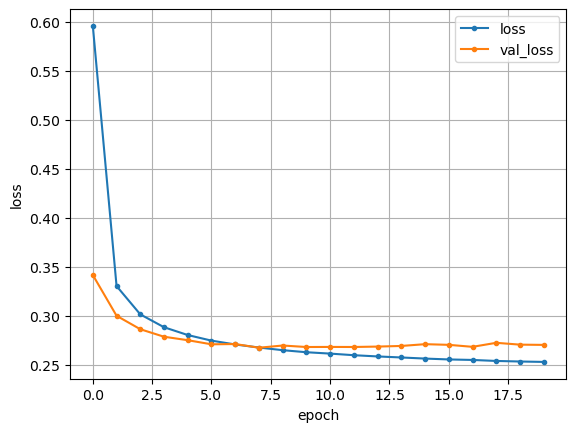

In [17]:
import matplotlib.pyplot as plt

loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

val_loss の値は，一度下がってからまた少し上がっているようです。これは，過学習している（すなわち，訓練データに合わせすぎて汎用性がなくなってきている）と思われます。

history2 も重ねてみましょう。

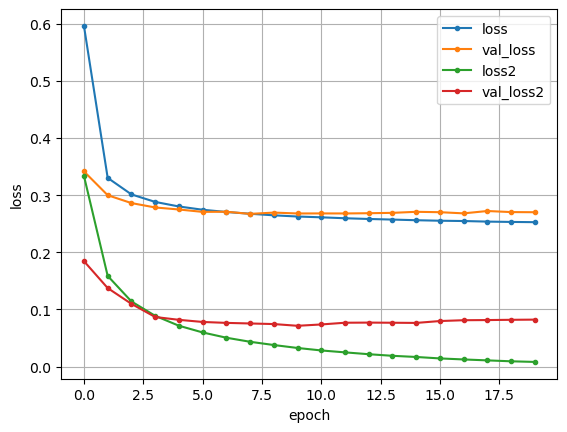

In [18]:
import matplotlib.pyplot as plt

loss     = history.history['loss']
val_loss = history.history['val_loss']
loss2     = history2.history['loss']
val_loss2 = history2.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.plot(range(nb_epoch), loss2,     marker='.', label='loss2')
plt.plot(range(nb_epoch), val_loss2, marker='.', label='val_loss2')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

訓練データに対しては値がどんどんよくなっているのに，テストデータに対しては悪くなってきているのは，過学習の特徴です。

In [26]:
p = model.predict_classes(x_test)
print(len(list (filter (lambda x: x[0]!=x[1], (zip(p, raw_y_test))))))
print(len(p))
p2 = model2.predict_classes(x_test)
print(len(list (filter (lambda x: x[0]!=x[1], (zip(p2, raw_y_test))))))
print(len(p2))

726
10000
206
10000
